# QUELLE ACTIVITÉ À LA MÉDIATHÈQUE LA SEMAINE DERNIÈRE ?

In [1]:
import pandas as pd
from datetime import datetime as dt,date
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from kiblib.utils import lucas_sns_params
from kiblib.utils.db import DbConn

In [2]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

Dernière mise à jour le 22-02-2025 à 09h33


In [3]:
db_conn = DbConn().create_engine()

In [4]:
# Semaine dernière = timestamp.semaine - 1 
last_week = dt.today().isocalendar()[1] - 1

# Cette année
this_year = dt.today().isocalendar()[0]

# Liste des jours de la semaine
jour_ouverture = ['Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Quel était le nombre d'entrées ?

In [5]:
query = f"""SELECT `datetime`,entrees
FROM statdb.stat_entrees
WHERE YEAR(`datetime`) >={this_year}"""

entrees_med_thisyear = pd.read_sql(query,db_conn)

In [6]:
#entrees_med_thisyear['semaine'] = pd.DatetimeIndex(entrees_med_thisyear['datetime']).week
entrees_med_thisyear['semaine'] = entrees_med_thisyear['datetime'].dt.isocalendar().week
entrees_med_thisyear['jour_semaine'] = pd.DatetimeIndex(entrees_med_thisyear['datetime']).day_name(locale='fr_FR.utf8')
entrees_med_thisyear['heure'] = pd.DatetimeIndex(entrees_med_thisyear['datetime']).hour
entrees_med_thisyear['date'] = pd.DatetimeIndex(entrees_med_thisyear['datetime']).date

In [7]:
entrees_med_last_week = entrees_med_thisyear[entrees_med_thisyear['semaine']==last_week]

activite_entrees_med_last_week = pd.pivot_table(data=entrees_med_last_week,
                                                index='heure',
                                                columns='jour_semaine',
                                                values='entrees',
                                               )

# Boucle pour ajouter les jours manquants
for jour in jour_ouverture:
    if jour not in activite_entrees_med_last_week.columns:
        activite_entrees_med_last_week[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez

# Trier les colonnes par ordre alphabétique (jours de la semaine)
activite_entrees_med_last_week= activite_entrees_med_last_week[jour_ouverture]

# Afficher le DataFrame mis à jour
#activite_entrees_med_last_week

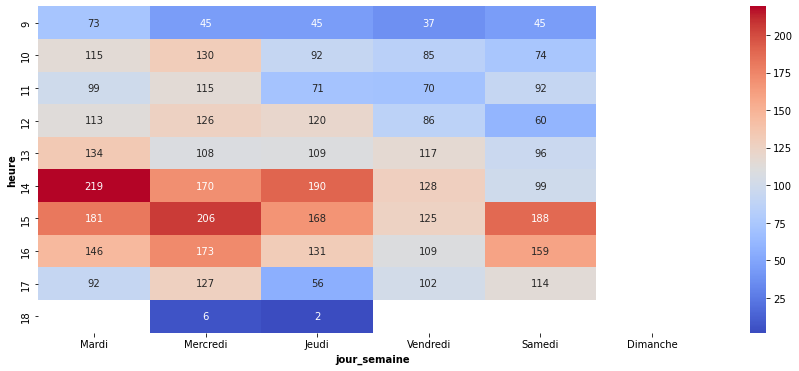

In [8]:
sns.heatmap(data=activite_entrees_med_last_week,cmap='coolwarm',annot=True,fmt='g')

plt.show()

> **Comment lire ce graphique ?** Il s'agit ici du nombre total d'entrées par heure et par jour de la semaine. Plus le chiffre se rapproche de la valeur maximum, plus la case est foncée. On trouve sur l'axe vertical, l'heure concernée. Exemple : 9 coreespond à la neuvième heure, soit le total d'entrées enregistrées entre 9h00 et 9h59.

# Quel était le nombre de réservations effectuées ?

In [34]:
query = f"""SELECT reservedate
FROM statdb.stat_reserves
WHERE YEAR(reservedate)={this_year}"""

resas_med_thisyear = pd.read_sql(query,db_conn)

In [37]:
#resas_med_thisyear['semaine'] = pd.DatetimeIndex(resas_med_thisyear['reservedate']).week
resas_med_thisyear['nombre_connexions_resas'] = 1
resas_med_thisyear['reservedate'] = pd.to_datetime(resas_med_thisyear['reservedate']) 
resas_med_thisyear['semaine'] = resas_med_thisyear['reservedate'].dt.isocalendar().week
resas_med_thisyear['jour_semaine'] = pd.DatetimeIndex(resas_med_thisyear['reservedate']).day_name(locale='fr_FR.utf8')
resas_med_thisyear['heure'] = pd.DatetimeIndex(resas_med_thisyear['reservedate']).hour
resas_med_thisyear['date'] = pd.DatetimeIndex(resas_med_thisyear['reservedate']).date

In [38]:
resas_med_last_week = resas_med_thisyear[resas_med_thisyear['semaine']==last_week]

activite_resas_med_last_week = pd.pivot_table(data=resas_med_last_week,
                                                index='heure',
                                                columns='jour_semaine',
                                                values='nombre_connexions_resas',
                                              aggfunc=sum
                                               )

# Boucle pour ajouter les jours manquants
for jour in jour_ouverture:
    if jour not in activite_resas_med_last_week.columns:
        activite_resas_med_last_week[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
        
# Trier les colonnes par ordre alphabétique (jours de la semaine)
activite_resas_med_last_week= activite_resas_med_last_week[jour_ouverture]

# Afficher le DataFrame mis à jour
#activite_resas_med_last_week

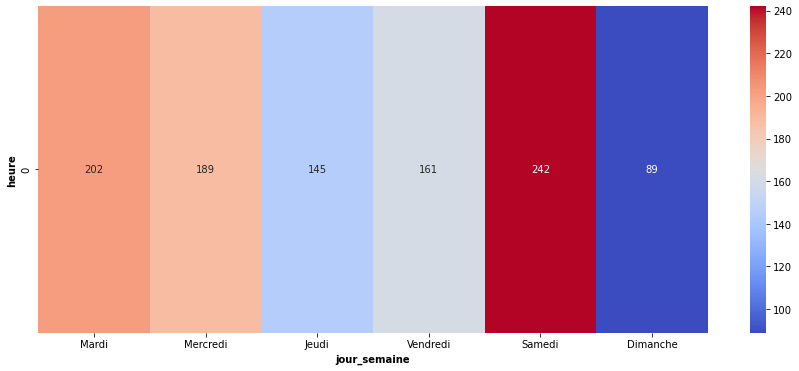

In [40]:
sns.heatmap(data=activite_resas_med_last_week,cmap='coolwarm',annot=True,fmt='g')

plt.show()

# Quel était le nombre de connexions aux ordinateurs ?

In [10]:
query = f"""SELECT heure_deb
FROM statdb.stat_webkiosk
WHERE YEAR(heure_deb)={this_year}"""

ordis_med_thisyear = pd.read_sql(query,db_conn)

In [11]:
#ordis_med_thisyear['semaine'] = pd.DatetimeIndex(ordis_med_thisyear['heure_deb']).week
ordis_med_thisyear['nombre_connexions_ordis'] = 1
ordis_med_thisyear['semaine'] = ordis_med_thisyear['heure_deb'].dt.isocalendar().week
ordis_med_thisyear['jour_semaine'] = pd.DatetimeIndex(ordis_med_thisyear['heure_deb']).day_name(locale='fr_FR.utf8')
ordis_med_thisyear['heure'] = pd.DatetimeIndex(ordis_med_thisyear['heure_deb']).hour
ordis_med_thisyear['date'] = pd.DatetimeIndex(ordis_med_thisyear['heure_deb']).date

In [12]:
ordis_med_last_week = ordis_med_thisyear[ordis_med_thisyear['semaine']==last_week]

activite_ordis_med_last_week = pd.pivot_table(data=ordis_med_last_week,
                                                index='heure',
                                                columns='jour_semaine',
                                                values='nombre_connexions_ordis',
                                              aggfunc=sum
                                               )

# Boucle pour ajouter les jours manquants
for jour in jour_ouverture:
    if jour not in activite_ordis_med_last_week.columns:
        activite_ordis_med_last_week[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
        
# Trier les colonnes par ordre alphabétique (jours de la semaine)
activite_ordis_med_last_week= activite_ordis_med_last_week[jour_ouverture]

# Afficher le DataFrame mis à jour
#activite_ordis_med_last_week

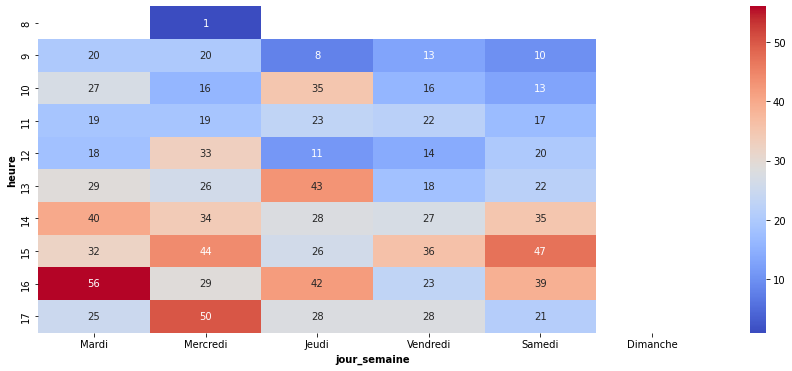

In [13]:
sns.heatmap(data=activite_ordis_med_last_week,cmap='coolwarm',annot=True)

plt.show()

# Quel était le nombre d'impressions ?

In [14]:
query = f"""SELECT date_impression 
FROM statdb.stat_impressions si
WHERE YEAR(date_impression) = {this_year}"""

impressions_med_thisyear = pd.read_sql(query,db_conn)

In [15]:
impressions_med_thisyear['date_impression'] = impressions_med_thisyear['date_impression'].astype('Datetime64')

#impressions_med_thisyear['semaine'] = pd.DatetimeIndex(impressions_med_thisyear['date_impression']).week
impressions_med_thisyear['nombre_connexions_wifi'] = 1
impressions_med_thisyear['semaine'] = impressions_med_thisyear['date_impression'].dt.isocalendar().week
impressions_med_thisyear['jour_semaine'] = pd.DatetimeIndex(impressions_med_thisyear['date_impression']).day_name(locale='fr_FR.utf8')
impressions_med_thisyear['heure'] = pd.DatetimeIndex(impressions_med_thisyear['date_impression']).hour
impressions_med_thisyear['date'] = pd.DatetimeIndex(impressions_med_thisyear['date_impression']).date

impressions_med_last_week = impressions_med_thisyear[impressions_med_thisyear['semaine']==last_week]

activite_impressions_med_last_week = pd.pivot_table(data=impressions_med_last_week,
                                                index='heure',
                                                columns='jour_semaine',
                                                values='nombre_connexions_wifi',
                                             aggfunc=sum
                                               )

# Boucle pour ajouter les jours manquants
for jour in jour_ouverture:
    if jour not in activite_impressions_med_last_week.columns:
        activite_impressions_med_last_week[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
        
# Trier les colonnes par ordre alphabétique (jours de la semaine)
activite_impressions_med_last_week= activite_impressions_med_last_week[jour_ouverture]

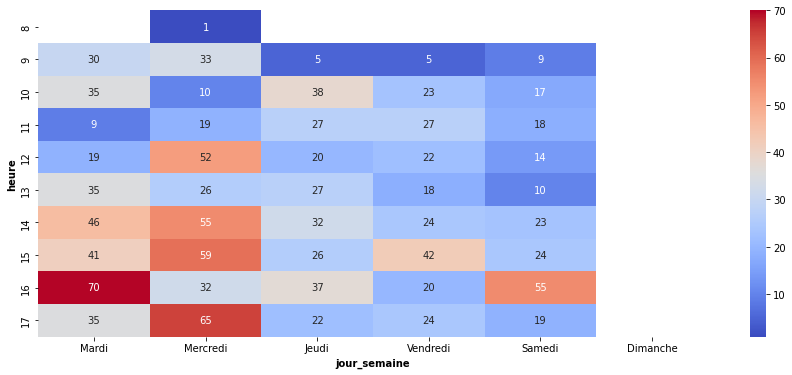

In [16]:
ax = sns.heatmap(data=activite_impressions_med_last_week,cmap='coolwarm',annot=True)
plt.show()

# Quel était le nombre de connexions au wifi ?

In [17]:
query = f"""SELECT start_wifi
FROM statdb.stat_wifi
WHERE YEAR(start_wifi)={this_year}"""

wifi_med_thisyear = pd.read_sql(query,db_conn)

In [18]:
#wifi_med_thisyear['semaine'] = pd.DatetimeIndex(wifi_med_thisyear['start_wifi']).week
wifi_med_thisyear['nombre_connexions_wifi'] = 1
wifi_med_thisyear['semaine'] = wifi_med_thisyear['start_wifi'].dt.isocalendar().week
wifi_med_thisyear['jour_semaine'] = pd.DatetimeIndex(wifi_med_thisyear['start_wifi']).day_name(locale='fr_FR.utf8')
wifi_med_thisyear['heure'] = pd.DatetimeIndex(wifi_med_thisyear['start_wifi']).hour
wifi_med_thisyear['date'] = pd.DatetimeIndex(wifi_med_thisyear['start_wifi']).date

In [19]:
wifi_med_last_week = wifi_med_thisyear[wifi_med_thisyear['semaine']==last_week]
activite_wifi_med_last_week = pd.pivot_table(data=wifi_med_last_week,
                                                index='heure',
                                                columns='jour_semaine',
                                                values='nombre_connexions_wifi',
                                             aggfunc=sum
                                               )

In [20]:
# Boucle pour ajouter les jours manquants
for jour in jour_ouverture:
    if jour not in activite_wifi_med_last_week.columns:
        activite_wifi_med_last_week[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
        
# Trier les colonnes par ordre alphabétique (jours de la semaine)
activite_wifi_med_last_week= activite_wifi_med_last_week[jour_ouverture]

# Afficher le DataFrame mis à jour
#activite_wifi_med_last_week

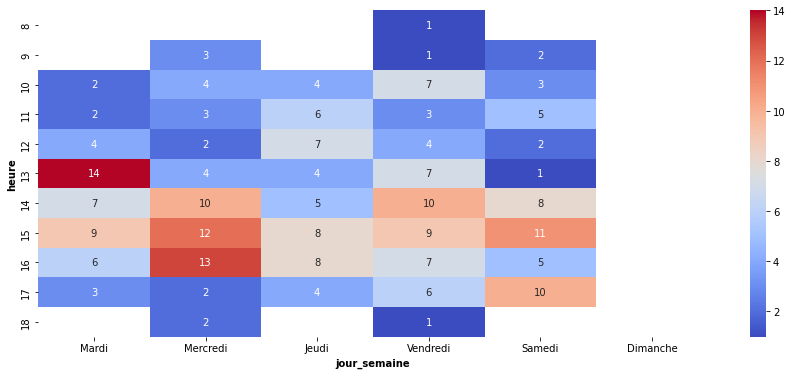

In [21]:
ax = sns.heatmap(data=activite_wifi_med_last_week,cmap='coolwarm',annot=True)
plt.show()

# Quel était le nombre de prêts/retours par heure et par jour ?

In [22]:
query=f"""SELECT issuedate,branchcode
FROM statdb.stat_issues si
WHERE YEAR(issuedate)={this_year}
AND branchcode ='MED'"""

prets_med_thisyear = pd.read_sql(query,db_conn)

In [23]:
#prets_med_thisyear['semaine'] = pd.DatetimeIndex(prets_med_thisyear['issuedate']).week
prets_med_thisyear['nombre_prets'] = 1
prets_med_thisyear['semaine'] = prets_med_thisyear['issuedate'].dt.isocalendar().week
prets_med_thisyear['jour_semaine'] = pd.DatetimeIndex(prets_med_thisyear['issuedate']).day_name(locale='fr_FR.utf8')
prets_med_thisyear['heure'] = pd.DatetimeIndex(prets_med_thisyear['issuedate']).hour
prets_med_thisyear['date'] = pd.DatetimeIndex(prets_med_thisyear['issuedate']).date

In [24]:
# Sélection de la semaine dernière
prets_med_last_week = prets_med_thisyear[prets_med_thisyear['semaine']==last_week]
activite_prets_med_last_week = pd.pivot_table(data=prets_med_last_week,
                                                index='heure',
                                                columns='jour_semaine',
                                                values='nombre_prets',
                                             aggfunc=sum
                                               )

# Boucle pour ajouter les jours manquants
for jour in jour_ouverture:
    if jour not in activite_prets_med_last_week.columns:
        activite_prets_med_last_week[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
        
# Trier les colonnes par ordre alphabétique (jours de la semaine)
activite_prets_med_last_week= activite_prets_med_last_week[jour_ouverture]

# Afficher le DataFrame mis à jour
#activite_prets_med_last_week

In [25]:
query = f"""SELECT returndate,branchcode
FROM statdb.stat_issues si 
WHERE YEAR(returndate)={this_year}
AND branchcode ='MED'"""

In [26]:
retours_med_thisyear = pd.read_sql(query,db_conn)

In [27]:
#retours_med_thisyear['semaine'] = pd.DatetimeIndex(retours_med_thisyear['returndate']).week
retours_med_thisyear['nombre_retours'] = 1
retours_med_thisyear['semaine'] = retours_med_thisyear['returndate'].dt.isocalendar().week
retours_med_thisyear['jour_semaine'] = pd.DatetimeIndex(retours_med_thisyear['returndate']).day_name(locale='fr_FR.utf8')
retours_med_thisyear['heure'] = pd.DatetimeIndex(retours_med_thisyear['returndate']).hour
retours_med_thisyear['date'] = pd.DatetimeIndex(retours_med_thisyear['returndate']).date

In [28]:
# Sélection de la semaine dernière
retours_med_last_week = retours_med_thisyear[retours_med_thisyear['semaine']==last_week]

In [29]:
# On aggrège pour avoir le nombre total de retours par heure et par jour
activite_retours_med_last_week = pd.pivot_table(data=retours_med_last_week,
                                                index='heure',
                                                columns='jour_semaine',
                                                values='nombre_retours',
                                             aggfunc=sum
                                               )

In [30]:
# Boucle pour ajouter les jours manquants
for jour in jour_ouverture:
    if jour not in activite_retours_med_last_week.columns:
        activite_retours_med_last_week[jour] = np.nan  # Ou une valeur par défaut que vous souhaitez
        
# Trier les colonnes par ordre alphabétique (jours de la semaine)
activite_retours_med_last_week= activite_retours_med_last_week[jour_ouverture]
# Afficher le DataFrame mis à jour
#activite_retours_med_last_week

In [31]:
for value in activite_prets_med_last_week.index:
    if value < 9 or value == 19:
        activite_prets_med_last_week = activite_prets_med_last_week.drop(labels=value)

In [32]:
for value in activite_retours_med_last_week.index:
    if value < 9 or value == 19:
        activite_retours_med_last_week = activite_retours_med_last_week.drop(labels=value)

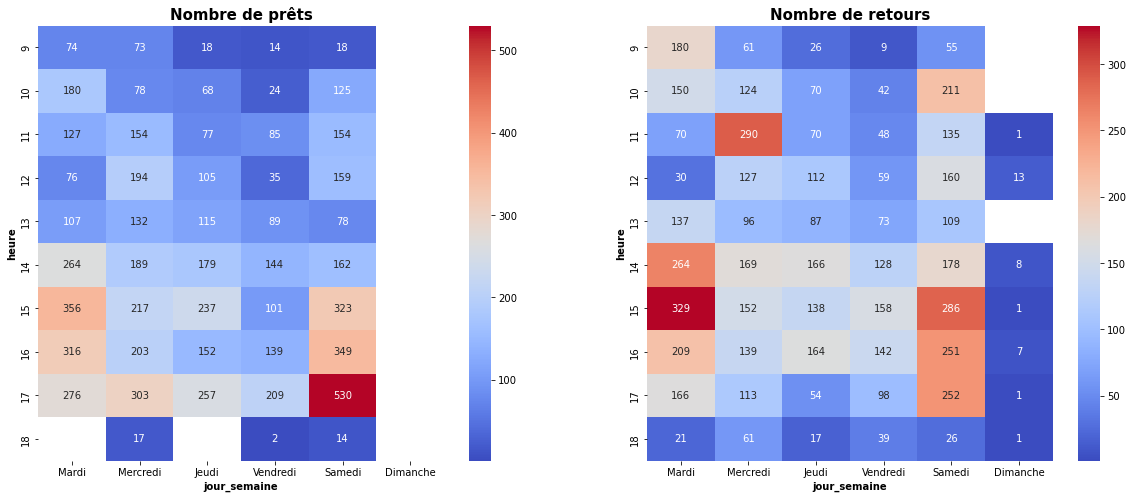

In [33]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.heatmap(data=activite_prets_med_last_week,cmap='coolwarm',annot=True,fmt='g',ax=ax[0])
ax[0].set_title('Nombre de prêts')


sns.heatmap(data=activite_retours_med_last_week,cmap='coolwarm',annot=True,fmt='g',ax=ax[1])
ax[1].set_title('Nombre de retours')

plt.show()
f.tight_layout()